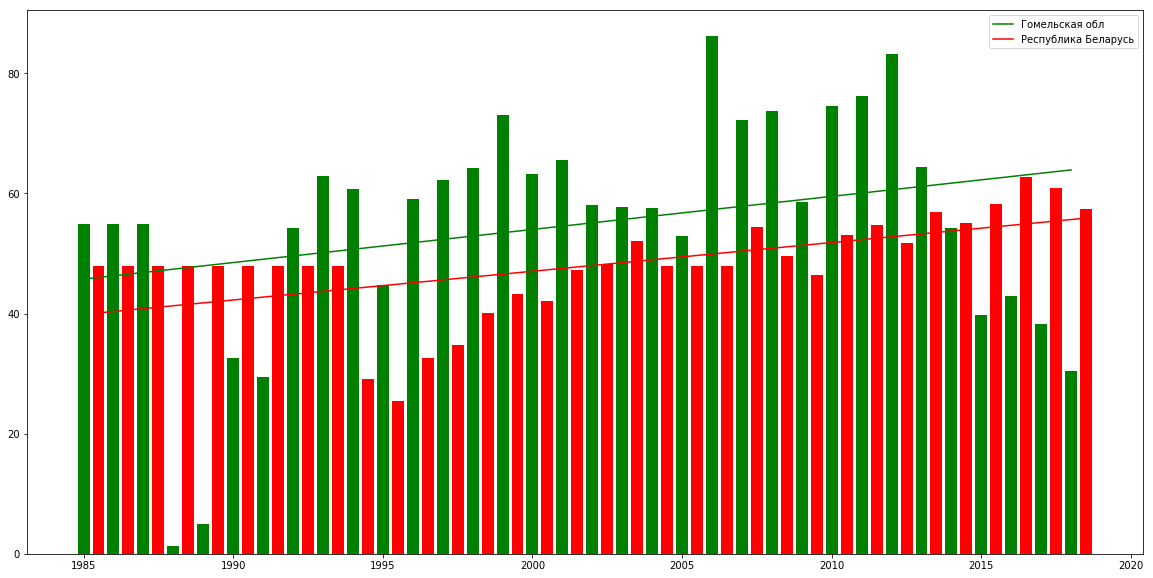

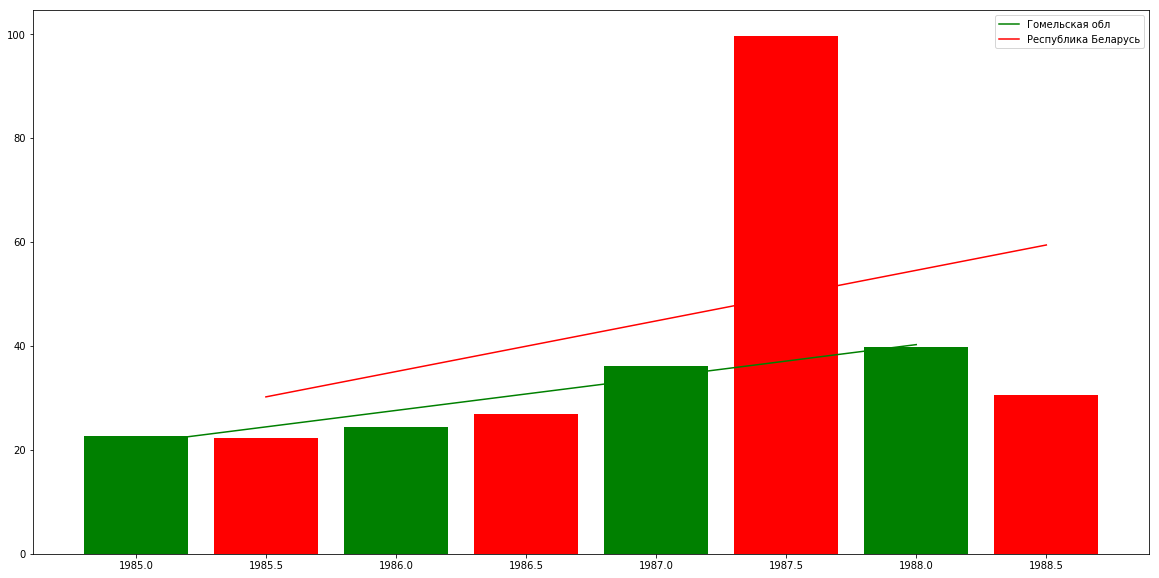

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import random
from scipy.optimize import curve_fit

def approxLinear(x, a, b):
   return a + b*x

def drawPict(name):
    #index_col=0
    thy2 = pd.read_csv(f'./data/{name}.csv', usecols=['year','obl','rb'])
    thy = thy2.fillna(thy2.mean())
    #thy2 = pd.read_csv('./data/thyroiditis.csv', index_col=0, usecols=['year','obl','rb']).fillna(thy.mean())
    #thy2.plot.bar(figsize=(14,7))

    year    = thy.iloc[:,0].values
    oblData = thy.iloc[:,1].values
    rbData  = thy.iloc[:,2].values

    fitOblParams, _ = curve_fit(approxLinear, year, oblData)
    fitRbParams, _ = curve_fit(approxLinear, year, rbData)
    fitOblData      = approxLinear(year, *fitOblParams)
    fitRbData      = approxLinear(year, *fitRbParams)

    fig, subp = plt.subplots(figsize=(20, 10))
    
    subp.bar(year, oblData, width=0.4, color='g', align='center')
    subp.plot(year, fitOblData, color='g')

    subp.bar(year+0.5, rbData, width=0.4, color='r', align='center')
    subp.plot(year+0.5, fitRbData, color='r')

    subp.legend(("Гомельская обл", "Республика Беларусь"))

    plt.show()

drawPict('thyroiditis')
drawPict('nodular_goiter')